In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import tensorflow
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml

from tensorflow.keras.datasets import fashion_mnist

### 2.1.1 PCA
#### Run PCA on the fashion-MNIST dataset.
1. How much variance do the first and second principal components explain? (5 marks)
2. Create a 2D scatterplot of the data projected onto the first two principal components. Differentiate between the different classes using colour. To what extent do the datapoints in your scatter plot cluster into the different classes? (5 marks)

How much variance do the first and second principal components explain? 

In [10]:
mnist = fetch_openml(name='Fashion-MNIST')
X = np.array(mnist.data)

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()# Fit on training set only.
#scaler.fit(X)# Apply transform to both the training set and the test set.
#X = scaler.transform(X)

In [4]:
pca = PCA(n_components=2)
pca.fit_transform(X)
print(pca.explained_variance_ratio_)

[0.2905654  0.17738509]


Create a 2D scatterplot of the data projected onto the first two principal components. Differentiate between the different classes using colour. To what extent do the datapoints in your scatter plot cluster into the different classes?

['9' '0' '0' ... '8' '1' '5']
original shape:    (70000, 784)
transformed shape: (70000, 2)


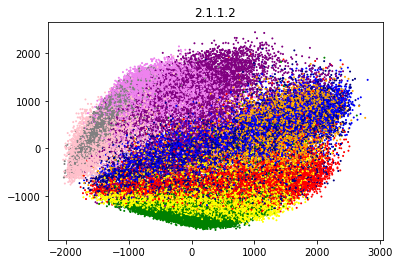

In [6]:
#consider standartisation of features
labels = np.array(mnist.target)
print(labels)
colors = {'0':'red', '1':'green', '2':'blue', '3':'yellow', '4':'orange', '5':'pink', '6':'navy', '7':'grey', '8':'purple', '9':'violet'}
colored_labels = np.array([colors[xi] for xi in labels])
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = colored_labels, alpha=1, s=1)
plt.axis('auto');
plt.title("2.1.1.2")
plt.show()


Same plot but with different transparency for better visibility.

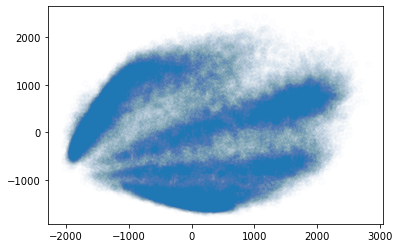

In [8]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.01)
plt.axis('auto');

### 2.1.2 K-Means
#### K-Means
1. Apply K-means (with K = 10) using the first two components from the PCA analysis above. Plot your clusters in 2D. It is up to you tochoose how best to plot clusters. (5 marks)
2. Analyse the relationship between the clusters produced by K-means and the class labels. It is up to you to decide what should be included in this analysis. (10 marks)

Apply K-means (with K = 10) using the first two components from the PCA analysis above. Plot your clusters in 2D.

In [11]:
from sklearn.cluster import KMeans

In [12]:
def plot_k_means(X, cluster_assignments, centroid_locations):
    #plt.figure(figsize=(10, 10))
    plt.axis('auto')
    plt.viridis() # Set colour map
    plt.scatter(X[:, 0], X[:, 1], s=20, c=cluster_assignments, alpha=0.02) # plot data points
    plt.scatter(centroid_locations[:, 0], centroid_locations[:, 1], s=200, marker='X', c=range(K), edgecolors='k') # plot centroids
    plt.show()

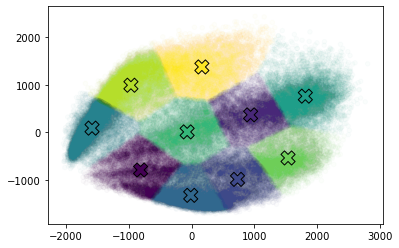

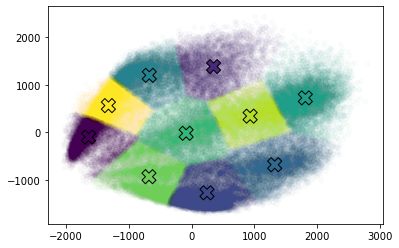

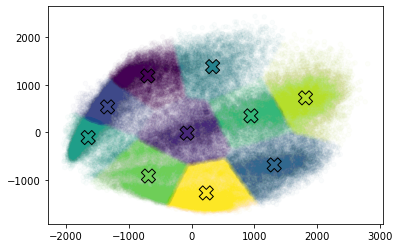

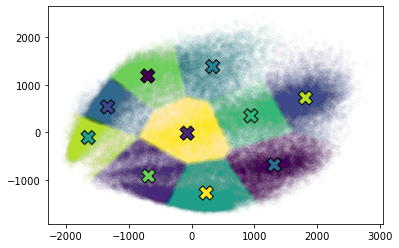

In [16]:
K = 10
kmeans = KMeans(K, init='random').fit(X_pca)
cluster_assignments = kmeans.predict(X_pca)
centroid_locations = kmeans.cluster_centers_
plot_k_means(X_pca, cluster_assignments, centroid_locations)

kmeans1 = KMeans(K).fit(X_pca)
cluster_assignments1 = kmeans1.predict(X_pca)
centroid_locations1 = kmeans1.cluster_centers_
plot_k_means(X_pca, cluster_assignments1, centroid_locations1)

kmeans2 = KMeans(K, init='random', max_iter = 2000).fit(X_pca)
cluster_assignments2 = kmeans2.predict(X_pca)
centroid_locations2 = kmeans2.cluster_centers_
plot_k_means(X_pca, cluster_assignments2, centroid_locations2)

kmeans3 = KMeans(K, init='random', n_init = 200).fit(X_pca)
cluster_assignments3 = kmeans3.predict(X_pca)
centroid_locations3 = kmeans3.cluster_centers_
plot_k_means(X_pca, cluster_assignments3, centroid_locations2)

Analyse the relationship between the clusters produced by K-means and the class labels.

##### anisotropicly distributed blobs: read when kmeans doesn't work, why and why here. Also: what about multiple iterations?

### 2.2 Classifiers
Building on what you learnt from the labs, here you are asked to contrast
two types of classifiers, Artificial neural networks (ANNs) and Support Vector
Machines (SVMs). Using the libraries used during the labs you only need
to run two classifiers, and discuss its advantages and disadvantages over the
other. You should make sure to control for overfitting. Use only the fashion
MNIST dataset for this task. Feel free to use a subset of the full dataset to
speed up optimisation.

#### 2.2.1 Artificial neural networks (10 marks)
Here you are going to study and discuss ANNs as a model for the fashion
MNIST classification dataset. In particular you should:
1. Train an ANN, plot the training and validation learning curves. Do
you see any signs of overfitting? Interpret and discuss your results. (1
mark)
2. What are your results in the testing dataset? Interpret and discuss
your results. (2 marks)
3. How sensitive is this method to different hyperparameters? Make use
of plots to help you discuss this point. (5 marks)
4. Plot decision boundaries and discuss their relevance. (2 marks)

Because MLPs are highly flexible models they can easily overfit the data. To prevent this methods such as early stopping (stop when test performance starts decreasing) and dropout (randomly drop units in the network) are used.

Train an ANN, plot the training and validation learning curves.

A learning curve plots the score over varying numbers of training samples, while a validation curve plots the score over a varying hyper parameter.

The learning curve is a tool for finding out if an estimator would benefit from more data, or if the model is too simple (biased).

In [22]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target,test_size=0.1, random_state=40)
#print(X_train.shape); print(X_test.shape)
#print(y_train.shape); print(y_test.shape)

#scaling
#not sure if neccessary
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#print(X_train.shape); print(X_test.shape)
#print(y_train.shape); print(y_test.shape)

#shuffle
np.random.seed(42)   # if you want reproducible results set the random seed value.
shuffle_index = np.random.permutation(63000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
np.random.seed(42)
#not sure if the random permutation num is correct
shuffle_index_test = np.random.permutation(7000)
X_test, y_test = X_test[shuffle_index_test], y_test[shuffle_index_test]
#X_train, y_train = np.random.shuffle((X_train, y_train))

#reduce the dataset
X_train, y_train = X_train[0:1000], y_train[0:1000]
X_test, y_test = X_test[0:200], y_test[0:200]

#fitting a completely untuned MLP classifier
#maybe tune it here, then plot the learbning curves, then experiment with diff hyperparameters
from sklearn.neural_network import MLPClassifier
#the early stopping means the algo stops when the validation scores stop improving.
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000, validation_fraction=0.2, early_stopping=True)
mlp.fit(X_train, y_train)

#should I use predict too?

print (mlp.score(X_train,y_train))
print (mlp.score(X_test,y_test))

0.899
0.755


In [4]:
X_red, y_red = X_train[0:1000], y_train[0:1000]
print(X_train.shape)
print(y_train.shape)
print(X_red.shape)
print(y_red.shape)
X_redtest, y_redtest = X_test[0:200], y_test[0:200]
print(X_test.shape)
print(y_test.shape)
print(X_redtest.shape)
print(y_redtest.shape)

(1000, 784)
(1000,)
(1000, 784)
(1000,)
(200, 784)
(200,)
(200, 784)
(200,)


In [48]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


#does this still use early stopping?
#alphas = np.logspace(-3, -0, 100)
#learning_rates = np.logspace(-4, -2, 100)
alphas = list({0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0})
learning_rates = list({0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01})
param_grid = {'learning_rate_init':learning_rates, 'alpha':alphas}

# define grid search
#clf = GridSearchCV(mlp, param_grid, cv=10)
#clf = RandomizedSearchCV(mlp, param_grid, cv = 5, scoring='accuracy', n_iter=10, verbose = 2)
clf = GridSearchCV(mlp, param_grid, cv = 5, scoring='accuracy', verbose = 2, n_jobs=-1)
# perform search
clf.fit(X_train, y_train)

# best estimator
params = clf.best_params_
print (clf.score(X_train,y_train))
print (clf.score(X_test,y_test))

#predictions = mlp.predict(X_test)
#from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test,predictions))
#print(classification_report(y_test,predictions))

Fitting 5 folds for each of 121 candidates, totalling 605 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   43.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 605 out of 605 | elapsed:  3.6min finished


0.943
0.8


In [49]:
#or try putting clf instead of mlp everywhere?
#alpha seems to be string?
params = clf.best_params_
best_lr = params.get("learning_rate_init")
best_alpha = params.get("alpha")
print(best_alpha)
print(best_lr)
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000, validation_fraction=0.2, learning_rate_init = best_lr, alpha = best_alpha, early_stopping=True)
mlp.fit(X_train, y_train)

0.8
0.005


MLPClassifier(alpha=0.8, early_stopping=True, hidden_layer_sizes=(10, 10, 10),
              learning_rate_init=0.005, max_iter=1000, validation_fraction=0.2)

In [50]:
#try running it and see if the results are gonna be any better
#plotting the learning curve on both the training ad validation or training data, not sure which one

from sklearn.model_selection import learning_curve

def plot_learning_curve(n, mlp, xs, ys):
    train_sizes, train_scores, valid_scores = learning_curve(estimator = mlp, X = xs, y = ys, cv = n)
    # Find the mean of training and test scores out of 10-fod Stratified
    #KFold cross validation run as part fo execution of validation curve

    train_mean = np.mean(train_scores, axis=1)
    valid_mean = np.mean(valid_scores, axis=1)

    # Plot the model scores (accuracy) against the dataset size
    #added train sizes and removed markers after starting to compile, recompile
    plt.plot(train_sizes, train_mean, color='blue', label='Training Accuracy')
    plt.plot(train_sizes, valid_mean, color='green', label='Validation Accuracy')

    plt.xlabel('Dataset size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


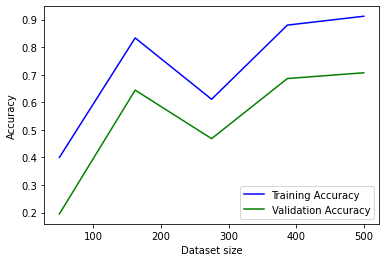

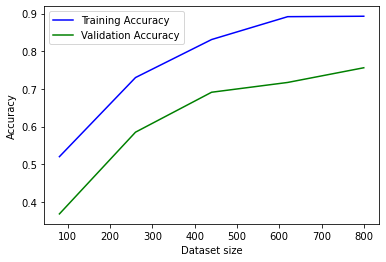

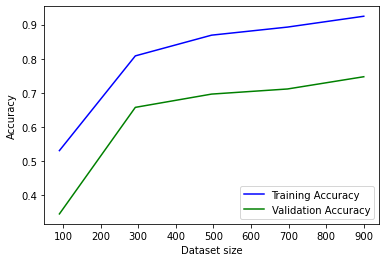

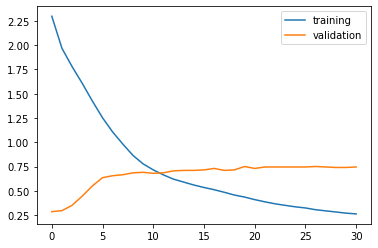

In [51]:
plot_learning_curve(2, mlp, X_train, y_train)
plot_learning_curve(5, mlp, X_train, y_train)
plot_learning_curve(10, mlp, X_train, y_train)
plt.plot(mlp.loss_curve_, label = "training")
plt.plot(mlp.validation_scores_, label = "validation")
plt.legend()

What are your results in the testing dataset?

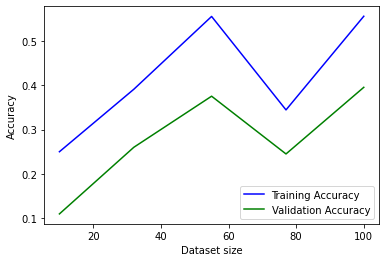

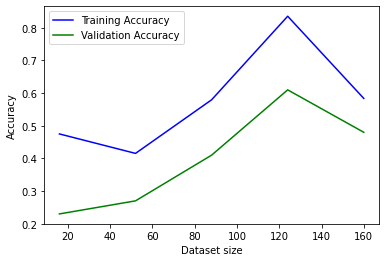

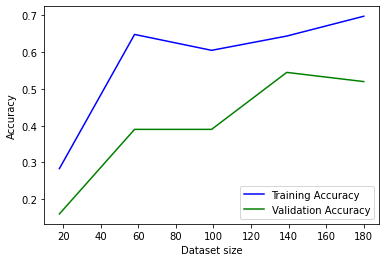

0.88
0.785


In [52]:
#the fuck is this supposed to be? The learning curve in the testing dataset? But I'm not learning on the testing dataset
plot_learning_curve(2, mlp, X_test, y_test)
plot_learning_curve(5, mlp, X_test, y_test)
plot_learning_curve(10, mlp, X_test, y_test)
print (mlp.score(X_train,y_train))
print (mlp.score(X_test,y_test))

How sensitive is this method to different hyperparameters? Make use of plots

hyperparameter refers to something that is fixed (usually manually chosen by the person training the model) throughout training and used to control the training process. Hyperparameters include the number of hidden layers, number of neurons in the hidden layers, learning rate, mini-batch size (for stochastic gradient descent optimisers) and regularisation parameter 𝛼.

In [11]:
from sklearn.model_selection import validation_curve

In [55]:
#use the validation curve to represent the sensitivity to hyperparameters
#you may need 2 separate ones for the lr and alpha
#lr_range = np.logspace(-4, -2, 100)
learning_rates = list({0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01})
train_scores, test_scores = validation_curve(estimator=mlp,
                                             X=X_train, y=y_train,
                                             cv=5,
param_name='learning_rate_init', param_range=lr_range)
#
# Find the mean of training and test scores out of 10-fod StratifiedKFold cross validation run as part fo execution of validation curve
#
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
#
# Plot the model scores (accuracy) against the paramater range
#


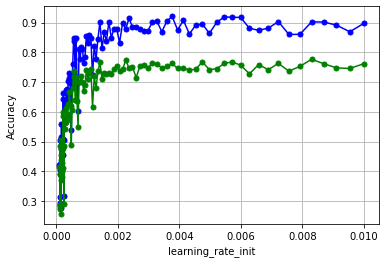

In [35]:
plt.plot(lr_range, train_mean,
         marker='o', markersize=5,
         color='blue', label='Training Accuracy')
plt.plot(lr_range, test_mean,
         marker='o', markersize=5,
         color='green', label='Validation Accuracy')
plt.xlabel('learning_rate_init')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

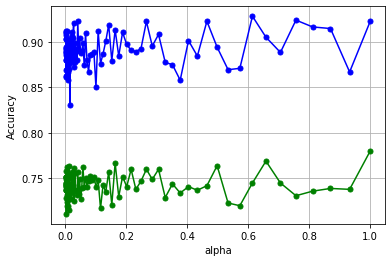

In [56]:
alpha_range = np.logspace(-3, -0, 100)
train_scores, test_scores = validation_curve(estimator=mlp,
                                             X=X_train, y=y_train,
                                             cv=5,
param_name='alpha', param_range=alpha_range)
#
# Find the mean of training and test scores out of 10-fod StratifiedKFold cross validation run as part fo execution of validation curve
#
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
#
# Plot the model scores (accuracy) against the paramater range
#
plt.plot(alpha_range, train_mean,
         marker='o', markersize=5,
         color='blue', label='Training Accuracy')
plt.plot(alpha_range, test_mean,
         marker='o', markersize=5,
         color='green', label='Validation Accuracy')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

Plot decision boundaries

In [58]:
def plot_decision_boundaries(X, y, model):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    #model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    #the problem with c, used to be y and
    y_color = [int(i)/10 for i in y]
    plt.scatter(X[:, 0], X[:, 1], c=y_color, alpha=0.8)
    plt.xlabel("x",fontsize=15)
    plt.ylabel("y",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

In [26]:
def plot_decision_boundaries(X, y, model):
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    #f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(10, 8))
    #the problem
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    #axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    #axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
    #axarr[idx[0], idx[1]].set_title(tt)
    plt.contourf(xx, yy, Z, cmap=pl.cm.Paired)
    plt.axis('off')

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=pl.cm.Paired)

    plt.show()


(1000, 2)
(1000,)
(1000,)
(1000,)
(583, 100)
(58300,)
(583, 100)
(58300,)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 784 is different from 2)

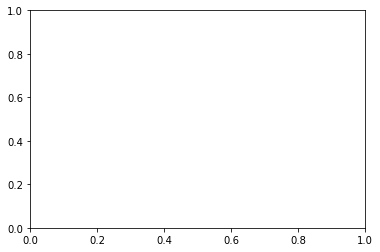

In [35]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

X = X_train[:, :2]
y = y_train
print(X.shape)
print(y.shape)
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of mlp ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
print(X0.shape)
print(X1.shape)
print(xx.shape)
print(xx.ravel().shape)
print(yy.shape)
print(yy.ravel().shape)
plot_contours(ax, mlp, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title("decision boundaries")
ax.legend()
plt.show()


In [27]:
plt.figure()
#plot_clf(mlp, X_train, y_train)
plot_decision_boundaries(X_train, y_train, mlp)
plt.show()

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 784 is different from 2)

<Figure size 432x288 with 0 Axes>

### 2.2.2 Support Vector Machines (15 marks)
Here you are going to study and discuss SVMs as a model for the fashion
MNIST classification dataset. In particular you should:
1. Train an SVM (with a specific Kernel), plot the training and validation learning curves. You may need to subsample the dataset if SVM training is taking too long. Do you see any signs of overfitting? Interpret and discuss your results. (1 mark)
32. What are your results in the testing dataset? Interpret and discuss your results. (2 marks)
3. How sensitive is this method to different hyperparameters? For example the different types of kernel (e.g. linear, RBF, etc.). Make use of plots (e.g. performance on test dataset as a function of different hyperparameters) to help you discuss this point. (5 marks)
4. Plot decision boundaries and discuss their relevance. (2 marks)
5. Compare your SVM results with the ANN above in terms of performance and the time it takes to train each method. For example, use bar plots to compare their performances and training times next to each other. Which is the better model? And why? (5 marks)

Train an SVM (with a specific Kernel), plot the training and validation learning curves.

In [7]:
from sklearn import svm
from sklearn.svm import SVC

In [9]:


poly_svm = SVC(kernel='poly', C=4)
poly_svm.fit(X_train, y_train)
print(f'poly SVM classifier accuracy: {poly_svm.score(X_train, y_train)}')

rbf_svm = SVC(kernel='rbf', C=4)
rbf_svm.fit(X_train, y_train)
print(f'rbf SVM classifier accuracy: {rbf_svm.score(X_train, y_train)}')

sig_svm = SVC(kernel='sigmoid', C=4)
sig_svm.fit(X_train, y_train)
print(f'sigmoid SVM classifier accuracy: {sig_svm.score(X_train, y_train)}')

#pick the kernel
lin_svm = SVC(kernel='linear', C=4)
lin_svm.fit(X_train, y_train)
print(f'linear SVM classifier accuracy: {lin_svm.score(X_train, y_train)}')
#hyperparameters to tune

#precomputed matrix must be square, to fix
#svm = SVC(kernel='precomputed', C=4)
#svm.fit(X_train, y_train)
#print(f'precomputed SVM classifier accuracy: {svm.score(X_train, y_train)}')

poly SVM classifier accuracy: 0.951
rbf SVM classifier accuracy: 0.991
sigmoid SVM classifier accuracy: 0.81
linear SVM classifier accuracy: 1.0


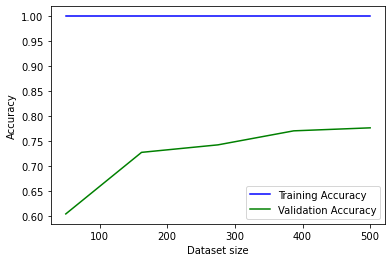

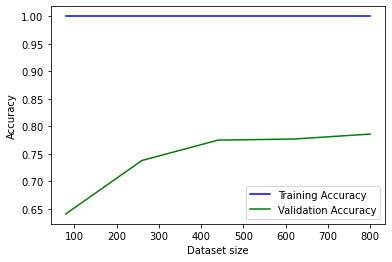

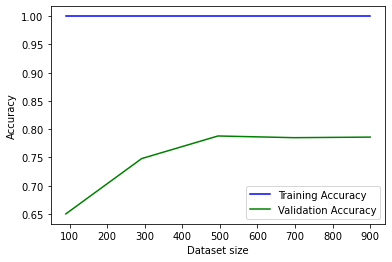

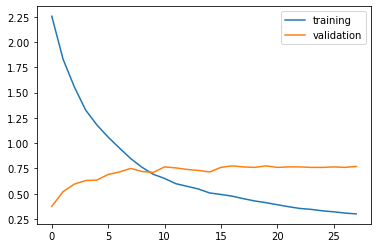

In [62]:
plot_learning_curve(2, lin_svm, X_train, y_train)
plot_learning_curve(5, lin_svm, X_train, y_train)
plot_learning_curve(10, lin_svm, X_train, y_train)
plt.plot(mlp.loss_curve_, label = "training")
plt.plot(mlp.validation_scores_, label = "validation")
plt.legend()

What are your results in the testing dataset?

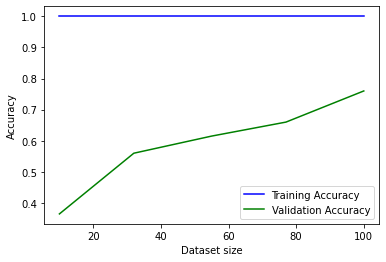

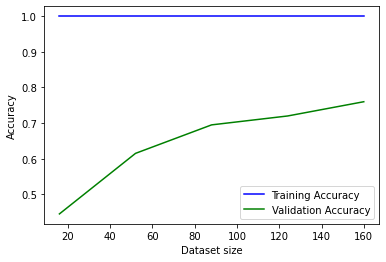

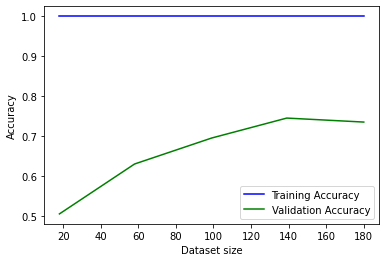

0.866
0.755


In [63]:
plot_learning_curve(2, lin_svm, X_test, y_test)
plot_learning_curve(5, lin_svm, X_test, y_test)
plot_learning_curve(10, lin_svm, X_test, y_test)
print (mlp.score(X_train,y_train))
print (mlp.score(X_test,y_test))

How sensitive is this method to different hyperparameters? For example the different types of kernel (e.g. linear, RBF, etc.). Make use of plots (e.g. performance on test dataset as a function of different hyperparameters)

In [16]:
#not gonna work, find a diff way of doing it

kernel_range = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
train_scores, test_scores = validation_curve(estimator=lin_svm,
                                             X=X_train, y=y_train,
                                             cv=5,
param_name='kernel', param_range=kernel_range)
#
# Find the mean of training and test scores out of 10-fod StratifiedKFold cross validation run as part fo execution of validation curve
#
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(kernel_range, train_mean,
         marker='o', markersize=5,
         color='blue', label='Training Accuracy')
plt.plot(kernel_range, test_mean,
         marker='o', markersize=5,
         color='green', label='Validation Accuracy')
plt.xlabel('kernels')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

ValueError: X should be a square kernel matrix

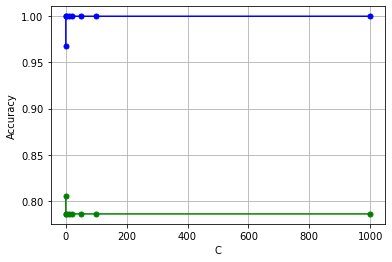

In [14]:
#genuinely don't know what the range should be
c_range = [0.01, 0.1, 1, 10, 20, 50, 100, 1000]
train_scores, test_scores = validation_curve(estimator=lin_svm,
                                             X=X_train, y=y_train,
                                             cv=5,
param_name='C', param_range=c_range)
#
# Find the mean of training and test scores out of 10-fod StratifiedKFold cross validation run as part fo execution of validation curve
#
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(c_range, train_mean,
         marker='o', markersize=5,
         color='blue', label='Training Accuracy')
plt.plot(c_range, test_mean,
         marker='o', markersize=5,
         color='green', label='Validation Accuracy')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

Plot decision boundaries.

In [ ]:
plt.figure()
plot_decision_boundaries(train_X, train_y, svm)
plt.show()

Compare your SVM results with the ANN above in terms of performance and the time it takes to train each method. For example, use bar plots to compare their performances and training times next to each other.

In [ ]:
#reduce the dataset, do it on a reduced dataset
classifiers = 
times = {}
plt.bar(classifiers,y)
plt.xlabel('training methods')
plt.ylabel("times")
plt.title('Categories Bar Plot')
plt.show()